In [1]:
import numpy as np
import pandas as pd

In [143]:
df = pd.read_csv('survey lung cancer.csv')

In [144]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [145]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [146]:
dum_columns = ['GENDER']
# dum_columns.remove('AGE')
# dum_columns.remove('LUNG_CANCER')
dum_columns 

['GENDER']

In [147]:
data = pd.get_dummies(df, columns=dum_columns)
# data = df
data['AGE'] = df['AGE'] / 40
labels = pd.factorize(data['LUNG_CANCER'])[0]
data = data.drop(columns='LUNG_CANCER')

In [148]:
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M
0,1.725,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1
1,1.850,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1
2,1.475,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,1.575,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,1.575,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.400,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,1.750,2,1,1,1,1,2,2,2,2,2,2,1,2,0,1
306,1.450,2,1,1,1,1,1,2,2,2,2,1,1,2,0,1
307,1.675,2,1,2,1,1,2,2,1,2,2,2,1,2,0,1


<AxesSubplot:>

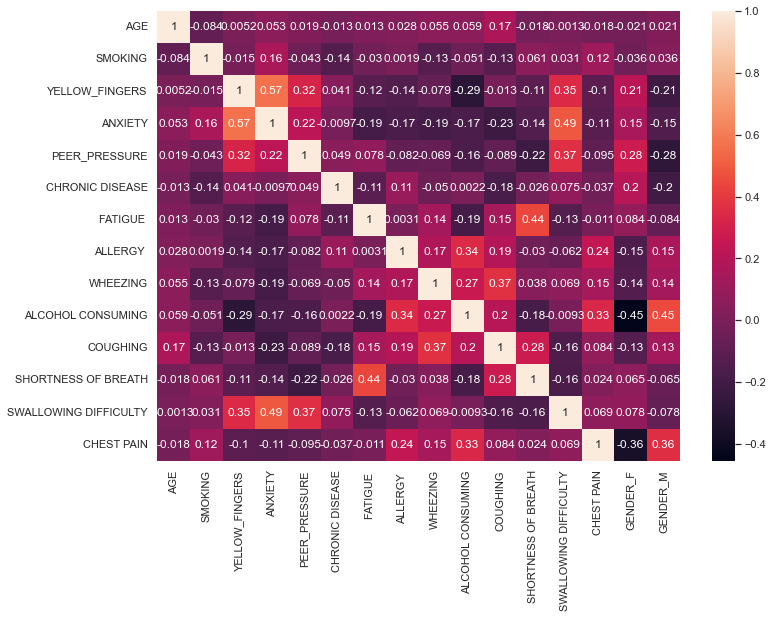

In [149]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr()[:-2], annot=True)

In [150]:
data = data.drop(['ANXIETY'], axis=1)
data

,AGE,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M
0,1.725,1,2,1,1,2,1,2,2,2,2,2,2,0,1
1,1.850,2,1,1,2,2,2,1,1,1,2,2,2,0,1
2,1.475,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,1.575,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,1.575,1,2,1,1,1,1,2,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1.400,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,1.750,2,1,1,1,2,2,2,2,2,2,1,2,0,1
306,1.450,2,1,1,1,1,2,2,2,2,1,1,2,0,1
307,1.675,2,1,1,1,2,2,1,2,2,2,1,2,0,1


<AxesSubplot:>

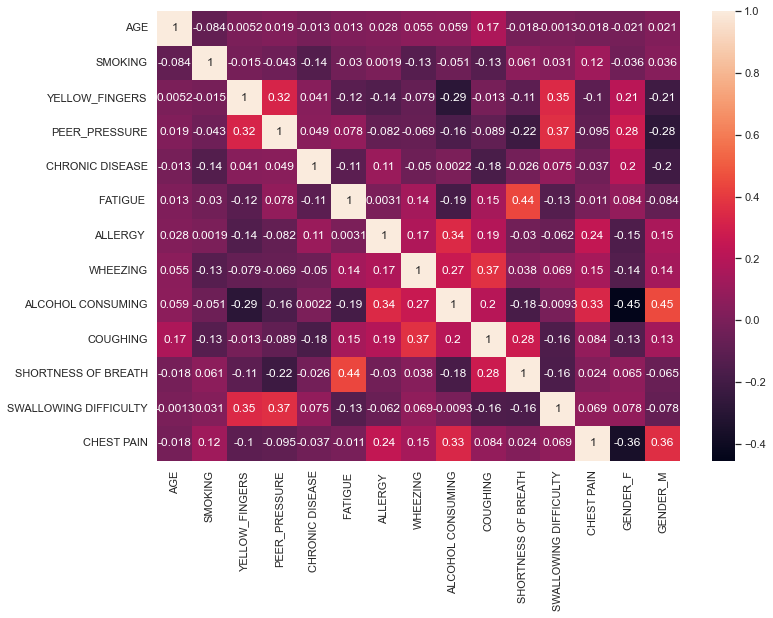

In [151]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr()[:-2], annot=True)

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)  

In [153]:
x_train.shape, x_test.shape

((247, 15), (62, 15))

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

lr = LogisticRegression(class_weight={1:3})
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_train)
lr_report = classification_report(y_train, lr_pred)
lr_acc = accuracy_score(y_train, lr_pred) * 100
lr_roc = roc_auc_score(y_train, lr_pred)

print(f"\nClassification Report: \n\n{lr_report}")
print(f"\nAccuracy is {lr_acc:.2f}")
print(f"\nROC AUC is {lr_roc:.2f}")


Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       218
           1       0.68      0.79      0.73        29

    accuracy                           0.93       247
   macro avg       0.82      0.87      0.85       247
weighted avg       0.94      0.93      0.93       247


Accuracy is 93.12

ROC AUC is 0.87


In [157]:
lr_pred = lr.predict(x_test)
lr_report = classification_report(y_test, lr_pred)
lr_acc = accuracy_score(y_test, lr_pred) * 100

print(f"\nClassification Report: \n\n{lr_report}")
print(f"\nAccuracy is {lr_acc:.2f}")
print(f"\nROC AUC is {lr_roc:.2f}")


Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.75      0.90      0.82        10

    accuracy                           0.94        62
   macro avg       0.86      0.92      0.89        62
weighted avg       0.94      0.94      0.94        62


Accuracy is 93.55

ROC AUC is 0.87


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = {'classifier' : [LogisticRegression()],
              'classifier__class_weight' : ['balanced', {1:2},{1:3},{1:4},{1:5},{1:10}]}

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [161]:
best_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(class_weight={1: 3})],
                         'classifier__class_weight': ['balanced', {1: 2},
                                                      {1: 3}, {1: 4}, {1: 5},
                                                      {1: 10}]},
             verbose=True)